In [1]:
# bakward NN (no hidden layer!)

import numpy as np
import timeit
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
def onehot(X):
    T = np.zeros((X.shape[0],np.max(X)+1))
    T[np.arange(len(X)),X] = 1 #Set T[i,X[i]] to 1
    return T

In [3]:
#Train Data
xtrain = np.loadtxt('xtrain.txt' , delimiter=',')
xtrain /= 255
ytrain = np.loadtxt('ytrain.txt' , delimiter=',').astype(int)
ytrain = onehot(ytrain)

#Test Data
xtest = np.loadtxt('xtest.txt' , delimiter=',')
xtest /= 255
ytest = np.loadtxt('ytest.txt' , delimiter=',').astype(int)
ytest_onehot = onehot(ytest)

In [4]:
#initialize random weights and biases
s = 0.2
w = (np.random.rand(784,10)-0.5)*s
b = (np.random.rand(10,)-0.5)*s

In [5]:
start = timeit.default_timer()
y_plot = []
for i in range(25000):
    
    k = np.random.randint(60000, size = 1)
    xtrain_rand = xtrain[k,:]
    ytrain_rand = ytrain[k,]

    p = (xtrain_rand .dot(w)) + b
    l = 0.001
    w = w - l * (np.transpose(xtrain_rand).dot(p - ytrain_rand))
    b = b - l * (p - ytrain_rand)
    
    # error in each iteration
    #out = np.argmax((xtest .dot(w) + b) , axis=1 )
    out = xtest .dot(w) + b
    #error = 0.5 * np.sum((ytest_onehot - out) ** 2)
    error = mean_squared_error(ytest_onehot, out)
    y_plot.append(error) 

stop = timeit.default_timer()
time = print('running time:', round((stop - start ),2), 's') 

running time: 258.44 s


In [6]:
output = np.argmax((xtest .dot(w) + b) , axis=1 )
k = 0
for i in range(10000):
    if output[i,]==ytest[i,]:
        k = k + 1
accuracy = (k/10000)*100        
print('accuracy:', round(accuracy,2), '%')  
        
                 
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix        
cm = confusion_matrix(output, ytest)
print(cm)

accuracy: 82.89 %
[[ 916    0   15   10    0   19   20    5   12   17]
 [   1 1086   35   13   19   23   11   36   40   13]
 [  10    9  850   63    9   21   15   26   23   10]
 [   6    4   19  821    2  105    2    9   50   15]
 [   5    3   26    8  890   39   25   31   26  160]
 [  13    0    3   21    5  567   14    2   23   10]
 [  19    4   20   14   11   28  858    5   19    6]
 [   2    1   18   29    5   24    1  878   13  100]
 [   6   27   41   26    7   54   10    1  755   10]
 [   2    1    5    5   34   12    2   35   13  668]]


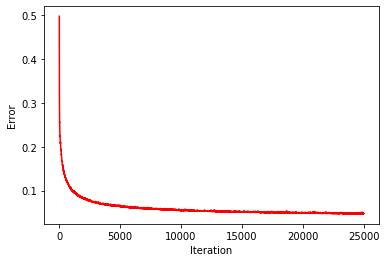

In [7]:
# plot error vs iterations
plt.plot( y_plot, 'r')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()